In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterSampler

from tqdm import trange
from scipy.spatial.distance import cdist
from scipy.stats import randint
import clustering

In [2]:
from IPython.core.interactiveshell import InteractiveShell
from importlib import reload
reload(clustering)
from clustering import *

%matplotlib inline
InteractiveShell.ast_node_interactivity = 'all'
sns.set()
sns.set(rc={'figure.figsize':(12,8)})

## Loading Data

In [3]:
df = pd.read_csv('Diskovery_Cell1_ThunderSTORM.csv')
df.head()

,id,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],uncertainty [nm]
0,1.0,1.0,2474.998618,6736.088180,195.815722,1841.965445,80.087915,10.501425,9.781846
1,2.0,1.0,4356.136836,14133.322371,145.009192,5599.702004,82.962749,24.851702,4.184589
2,3.0,1.0,4542.775300,9091.265025,121.313419,221.442108,39.507939,4.162599,15.045367
3,4.0,1.0,5977.444344,7594.973438,137.276419,155.518749,39.499220,4.681645,24.730111
4,5.0,1.0,6079.459555,11231.168432,137.261612,2693.631410,59.415820,11.278048,4.647010


## Displaying Raw Data

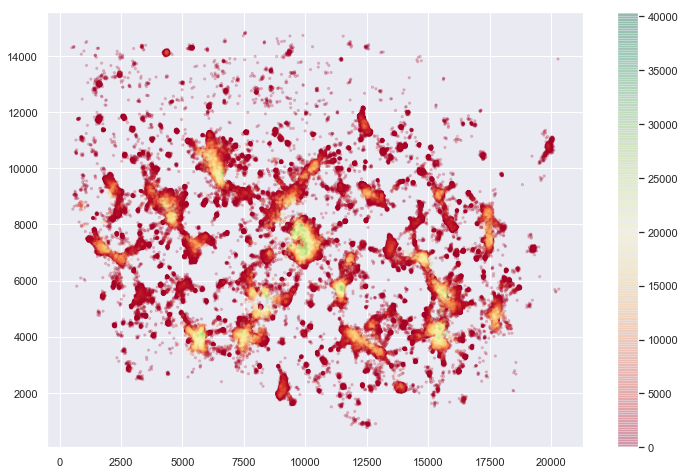

In [4]:
df = df.sort_values(by=['intensity [photon]'])
skip = 1

img = plt.scatter(df[::skip]['x [nm]'],
                  df[::skip]['y [nm]'],
                  c=df[::skip]['intensity [photon]'],
                  s=5, cmap='RdYlGn',alpha=0.2)
_ = plt.colorbar(img)

## Applying DBSCAN

In [5]:
XY = np.column_stack((df['x [nm]'],df['y [nm]']))[::10]

%matplotlib widget
sns.set(rc={'figure.figsize':(6,6)})

(0.7275062070830143, 0.004057153100956422)

Estimated number of clusters: 58
Estimated number of noise points: 5561
Total number of points: 89939


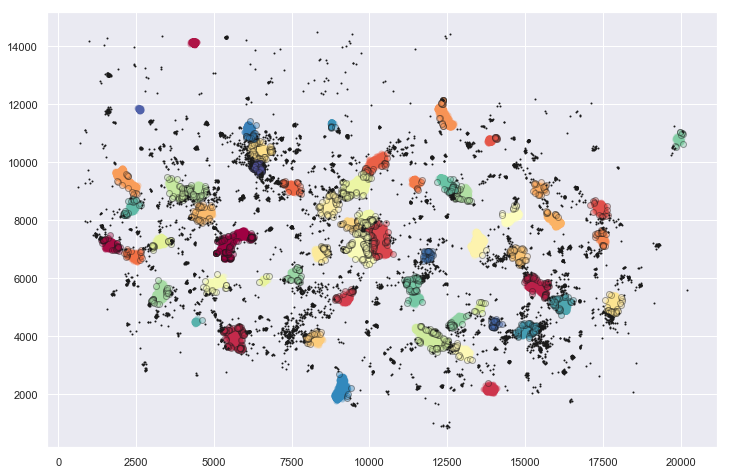

In [11]:
db = DBSCAN(eps=147, min_samples=73, n_jobs=6)
custom_silhouette(db,XY,cv=3)
dbscan_verbose(db, XY, plot=True)

In [ ]:
dbscan_verbose(db, XY, plot=True,n=[-1,0])

## Sparse neighbor distance matrix

Try this again next time and throw into DBSCAN to see if performance improves

In [ ]:
from sklearn.neighbors import radius_neighbors_graph

coords = np.column_stack((df['x [nm]'],df['y [nm]']))[::10]

test = radius_neighbors_graph(X=coords, radius=200, mode='distance')


## Hyper Parameter Search

In [6]:
dbscan = DBSCAN(n_jobs=6)

param_dist = {"eps": randint(120, 200),
              "min_samples": randint(30, 300)}
    
results = random_search_custom(dbscan,param_dist,XY,n=200,cv=3)
results

100%|████████████████████████████████████████| 200/200 [38:02<00:00, 11.42s/it]


,score,stdev,eps,min_samples
2,0.728344,0.008226,147,73
198,0.726878,0.005374,140,81
147,0.726490,0.006710,152,71
120,0.726244,0.001858,183,124
171,0.724682,0.002369,163,119
160,0.724490,0.003738,155,94
182,0.724342,0.002196,155,91
87,0.724239,0.005013,139,68
36,0.724238,0.004385,180,115
15,0.723926,0.004552,167,96
